<a href="https://colab.research.google.com/github/ruthouille/Projet/blob/main/Churn_DE_BADIBENGI_GOURDET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Churn**
> ### **Objectif**
> L'objectif de churn est de prédire, à l'aide des éléments contenus dans la base de données, si un client va quitter l'entreprise. Nous sommes donc dans une problématique d'apprentissage supervisé de type régression logistique. En effet, nous pouvons déterminer deux types de variables, expliquée et explicative. Ici la variable expliquée est "churn" et les variables explicatives sont toutes les autres, qui peuvent être considérées comme des facteurs poussant le client à quitter l'entreprise.


### **Chargement des données**

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [38]:
df = pd.read_csv("https://assets-datascientest.s3-eu-west-1.amazonaws.com/de/total/churn.csv", index_col="customerID")

df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,Yes,No,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.2,No
2495-KZNFB,Female,0,No,No,33,Yes,Yes,Fiber optic,Yes,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.65,2989.6,No
4367-NHWMM,Female,0,No,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,24.90,24.9,No
8898-KASCD,Male,0,No,No,39,No,No phone service,DSL,No,No,Yes,Yes,No,No,One year,No,Mailed check,35.55,1309.15,No


## **1.   Premières observations**

> Dans un premier temps, nous pouvons observer que certaines variables tel que "SeniorCitizen" ont des valeurs égalent à 1 pour la classe positive et à 0 pour la classe négative. De plus, d'autres variables tels que "Partner", "Dependents", "PhoneService" "PaperlessBilling" et "churn" valent "Yes" ou "No", ainsi, nous pourrons remplacer ces valeurs par 1 et 0 (Yes et No). Des variables tels que "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV" et "StreamingMovies" contiennent des valeurs qui peuvent également être remplacé par "Yes" ou "No" (ex: No internet service, No phone service, Fibre optic,DSL, etc.).

> Nous allons donc commencer par nettoyer nos données et remplacer les valeurs citées plus haut.

# 1.    Nettoyage de données

*   Détection des valeurs manquantes













In [39]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [40]:
print("Il y a", df.isna().any().sum(), "valeur manquante")

Il y a 0 valeur manquante




> Aucune valeur manquante n'a été détectée.



*   Détection des valeurs abérrantes



In [41]:
# On a fait la même chose pour toutes les autres colonnes

df.loc[(df["SeniorCitizen"] != 0 ) & (df["SeniorCitizen"] != 1)]
df.loc[(df["StreamingMovies"] != "Yes" ) & (df["StreamingMovies"] != "No") & (df["StreamingMovies"] != "No internet service")]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,


*   On remplace les valeurs "Yes", "No", "No internet service", "No phone service", "Femal", "Male", "Fiber optic" et "DSL" par 1 ou 0.

*   De plus, on s'interesse à la colonne "Contract" qui contient les valeurs "Two year", "Month-to-month", "One year". On décide donc de remplacer "Two year" par 730, car il y a 730 jours dans deux années, "Month-to-month" est remplacé par 30 jours et enfin, "One year" par 365 jours.

In [42]:
#On remplace les valeurs "Yes", "No", "No internet service", "No phone service", "Femal", "Male", "Fiber optic" et "DSL" par 1 ou 0.
df = df.replace(to_replace = ["Yes", "No", "No internet service", "No phone service", "Female", "Male", "Fiber optic", "DSL"],
                   value=[1, 0, 0, 0,1,0,1,1])

#On remplace "Two year" par 730 et "Month-to-month" par 30
df = df.replace(to_replace=["Two year", "Month-to-month", "One year"], value=[730, 30, 365])


#On verifie que seul ces trois valeurs sont présentes dans cette colonne
df.loc[(df["Contract"] != 730 ) & (df["Contract"] != 30) & (df["Contract"] != 365)]

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,0,0,1,1,72,1,1,0,0,0,0,0,0,0,730,0,Credit card (automatic),24.10,1734.65,0
9688-YGXVR,1,0,0,0,44,1,0,1,0,1,1,0,1,0,30,1,Credit card (automatic),88.15,3973.2,0
9286-DOJGF,1,1,1,0,38,1,1,1,0,0,0,0,0,0,30,1,Bank transfer (automatic),74.95,2869.85,1
6994-KERXL,0,0,0,0,4,1,0,1,0,0,0,0,0,1,30,1,Electronic check,55.90,238.5,0
2181-UAESM,0,0,0,0,2,1,0,1,1,0,1,0,0,0,30,0,Electronic check,53.45,119.5,0



*  Pour la colonne "PaymentMethod" nous allons utiliser la technique de l'encodage one-hot, grâce à la fonction OneHotEncoder de sklearn.preprocessing. Cette fonction va donc nous permettre d'encoder les valeurs de cette colonne par 1 ou 0.



In [43]:
df_new = df.copy()

transformer = make_column_transformer(
    (OneHotEncoder(), ['PaymentMethod']),
    remainder='passthrough')

transformed = transformer.fit_transform(df_new)
df_new = pd.DataFrame(transformed,columns=transformer.get_feature_names())

#On renomme le nom des nouvelles colonnes encodées
dico = {"onehotencoder__x0_Bank transfer (automatic)": "Bank transfer (automatic)",
        "onehotencoder__x0_Credit card (automatic)": "Credit card (automatic)",
        "onehotencoder__x0_Electronic check": "Electronic check",
        "onehotencoder__x0_Mailed check": "Mailed check"}
df_new = df_new.rename(dico, axis=1)

#On change le type des nouvelles colonnes
dico2 = {"Bank transfer (automatic)":"int",
         "Credit card (automatic)":"int",
         "Electronic check":"int",
         "Mailed check":"int"}
df_new = df_new.astype(dico2)

df_new.index = df.index
df_new.head(5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,0,1,0,0,0,0,1,1,72,1,...,0,0,0,0,0,730,0,24.1,1734.65,0
9688-YGXVR,0,1,0,0,1,0,0,0,44,1,...,1,1,0,1,0,30,1,88.15,3973.2,0
9286-DOJGF,1,0,0,0,1,1,1,0,38,1,...,0,0,0,0,0,30,1,74.95,2869.85,1
6994-KERXL,0,0,1,0,0,0,0,0,4,1,...,0,0,0,0,1,30,1,55.9,238.5,0
2181-UAESM,0,0,1,0,0,0,0,0,2,1,...,0,1,0,0,0,30,0,53.45,119.5,0




*   Les valeurs de la colonne "TotalCharges" ne sont pas toutes au même format. En effet, cette colonne est au format str et on y trouve des valeurs avec des points, ainsi que des valeurs sans points. Nous ne pouvons donc pas convertir cette colonne directement en utilisant une fonction telle que astype car cela nous génère une erreur. 

*   Nous allons donc convertir cette colonne au format numérique en utilisant "to_numeric".





In [44]:
y = df_new

y = pd.to_numeric(y["TotalCharges"], errors='coerce')
df_new["TotalCharges"] = y

#On verifie encore une fois s'il y a des valeurs manquantes
df_new.isna().sum()

Bank transfer (automatic)     0
Credit card (automatic)       0
Electronic check              0
Mailed check                  0
gender                        0
SeniorCitizen                 0
Partner                       0
Dependents                    0
tenure                        0
PhoneService                  0
MultipleLines                 0
InternetService               0
OnlineSecurity                0
OnlineBackup                  0
DeviceProtection              0
TechSupport                   0
StreamingTV                   0
StreamingMovies               0
Contract                      0
PaperlessBilling              0
MonthlyCharges                0
TotalCharges                 10
Churn                         0
dtype: int64

*   Nous pouvons remarquer que la colonne "TotalCharges" contient 10 valeurs manquantes.



In [45]:
# On affiche les lignes avec des valeurs manquantes
df_new[df_new.isnull().any(axis=1)]

,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,,
2775-SEFEE,1,0,0,0,0,0,0,1,0,1,...,1,0,1,0,0,730,1,61.9,NaN,0
1371-DWPAZ,0,1,0,0,1,0,1,1,0,0,...,1,1,1,1,0,730,0,56.05,NaN,0
3213-VVOLG,0,0,0,1,0,0,1,1,0,1,...,0,0,0,0,0,730,0,25.35,NaN,0
2923-ARZLG,0,0,0,1,0,0,1,1,0,1,...,0,0,0,0,0,365,1,19.7,NaN,0
7644-OMVMY,0,0,0,1,0,0,1,1,0,1,...,0,0,0,0,0,730,0,19.85,NaN,0
5709-LVOEQ,0,0,0,1,1,0,1,1,0,1,...,1,1,0,1,1,730,0,80.85,NaN,0
3115-CZMZD,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,730,0,20.25,NaN,0
2520-SGTTA,0,0,0,1,1,0,1,1,0,1,...,0,0,0,0,0,730,0,20.0,NaN,0
4472-LVYGI,1,0,0,0,1,0,1,1,0,0,...,0,1,1,1,0,730,1,52.55,NaN,0


*   On remplace les valeurs manquantes de la colonne "TotalCharges" par sa mediane.

In [46]:
#On remplace les valeurs manquantes par la valeur 0
df_new["TotalCharges"] = df_new["TotalCharges"].fillna(df_new["TotalCharges"].median())

#On affiche les lignes qui contiennent des valeurs manquantes
df_new[df_new.isnull().any(axis=1)]

,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,,


# 1.   Analyse des données

> Nous allons observer le comportement de total charge, phoneservice, ainsi que d'autres variables pour voir comment elles se comportent en fonction de Churn.






*   Nous allons commencer par observer comment se comporte la variable "Churn" qui est la variable expliquée.



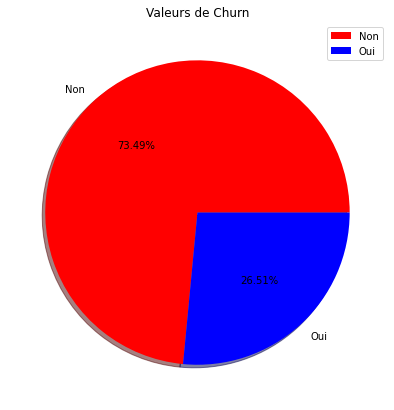

In [47]:
plt.figure(figsize=(7,7))
plt.title("Valeurs de Churn")
plt.pie([df_new["Churn"].value_counts()[0], df_new["Churn"].value_counts()[1]],
        labels=["Non", "Oui"],
        colors=["red", "blue"],
        autopct=(lambda x: str(np.round(x,2)) + "%"),
        shadow=True)
plt.legend();

Nous observons donc qu'il y a 73,49% où churn vaut 0 (classe négative) et 26,51% lorsque churn vaut 1 (classe positive).

*   Afin de comprendre comment se comporte Churn avec les autres variables, nous allons créer des graphes en utilisant la librairie matplotlib, pour les comparer et essayer d'en tirer une première conclusion avant d'utiliser les algorithmes de machine learning.


In [48]:
#On utilise groupby pour grouper les élément du Dataframe entre gender et Churn, on utilise size pour avoir
#la valeur total d'élément entre gender et churn (lorsque churn vaut 0 ou 1 et pareil pour gender)

df_gender = df_new.groupby(['gender', 'Churn']).size().reset_index()
total = {0: "Total"}
df_gender = df_gender.rename(total, axis = 1)
df_gender["%"] = np.round(df_gender["Total"]/100, 2)

df_gender.head()

,gender,Churn,Total,%
0,0,0,2254,22.54
1,0,1,796,7.96
2,1,0,2145,21.45
3,1,1,791,7.91


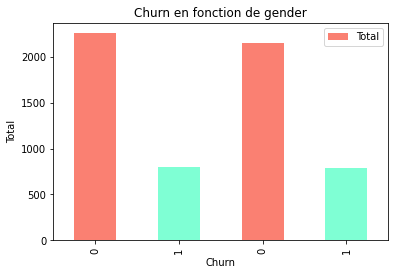

In [49]:
df_gender.plot.bar(x="Churn", y='Total', color = ["salmon", "aquamarine"],
                   title= "Churn en fonction de gender",
                   ylabel="Total");

Les deux premiers graphes (à gauche) représentent des hommes, et les deux derniers graphes (à droite) représentent des femmes. On peut constater cela, grâce à notre tableau qui regroupe "gender" et "Churn". En effet, on a deux états de "gender", ainsi nous remarquons qu'il y a 22,54% de personne qui résilient et 7,96% de personnes qui ne résilient pas lorsque ce sont des hommes. 

Nous suivons le même raisonnement pour les femmes, et nous remarquons qu'il y a 21,45% de personnes qui résilient et que seulement 7,91% de personnes de résilient pas lorsque ce sont des femmes.



*   Nous allons nous intéresser aux différents modes de payment, et observer le nombre de départ selon les moyens de payements.


In [50]:
#On commence par créer une fonction pour simplifier l'affichage de nos graphiques

def display(a, my_df):
  data = my_df.groupby([a, "Churn"]).size().reset_index()
  total = {0: "Total"}
  data = data.rename(total, axis = 1)
  data["%"] = np.round(data["Total"]/100, 2)

  graph = data.plot.bar(x="Churn", y='Total', color = ["salmon", "aquamarine"],
                   title= "Churn en fonction de" + " " +  a,
                   ylabel="Total");

  return (data)



,Bank transfer (automatic),Churn,Total,%
0,0,0,3315,33.15
1,0,1,1363,13.63
2,1,0,1084,10.84
3,1,1,224,2.24


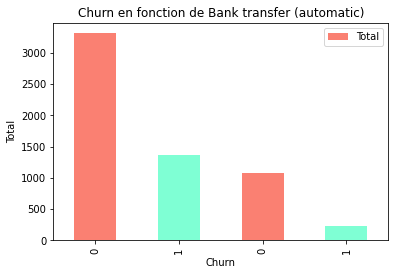

In [51]:
display('Bank transfer (automatic)', df_new)

Nous remarquons que lorsque le payement ne se fait pas via Bank transfer, il y a 33,15% de personnes qui ne résilient pas et 13,63% résilient. Lorsque le payement se fait via Bank transfer, 10,84% de personnes ne résilient pas et 2,24% des personnes résilient. 

,Credit card (automatic),Churn,Total,%
0,0,0,3294,32.94
1,0,1,1389,13.89
2,1,0,1105,11.05
3,1,1,198,1.98


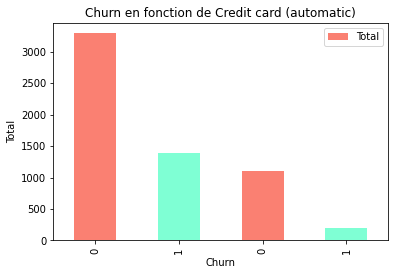

In [52]:
display('Credit card (automatic)', df_new)

Nous remarquons que lorsque le payement ne se fait pas via une carte de credit de manière automatique, il y a 32,94% de personnes qui ne résilient pas et 13,89% qui résilient. Lorsque le payement se fait via une carte de credit automatique, 11,05% de personnes ne résilient pas et 1,98% des personnes résilient. 

,Electronic check,Churn,Total,%
0,0,0,3295,32.95
1,0,1,685,6.85
2,1,0,1104,11.04
3,1,1,902,9.02


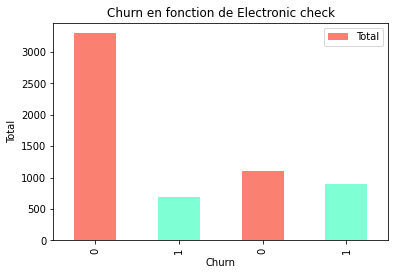

In [53]:
display('Electronic check', df_new)

Nous remarquons que lorsque le payement ne se fait pas via electronic check, il y a 32,95% des personnes qui ne résilient pas et 6.85% résilient. Lorsque le payement se fait via electronic check, 11,04% de personnes ne résilient pas et 9,02% des personnes résilient. 

,Mailed check,Churn,Total,%
0,0,0,3293,32.93
1,0,1,1324,13.24
2,1,0,1106,11.06
3,1,1,263,2.63


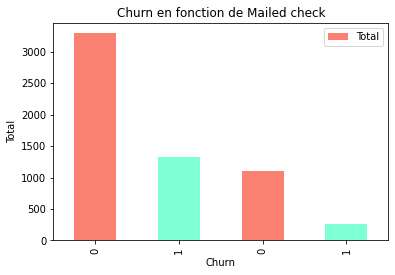

In [54]:
display("Mailed check", df_new)

Nous remarquons que lorsque le payement ne se fait pas via Mailed check, il y a 32,93% de personnes qui ne résilient pas et 13,24% qui résilient. Lorsque le payement se fait via Mailed check, 11,06% de personnes ne résilient pas et 2,63% des personnes résilient. 


*   On s'interesse également à PhoneService afin de voir comment se comporte cette variables en fonction de Churn.



,PhoneService,Churn,Total,%
0,0,0,441,4.41
1,0,1,149,1.49
2,1,0,3958,39.58
3,1,1,1438,14.38


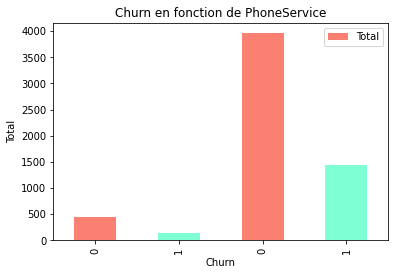

In [55]:
display("PhoneService", df_new)

Nous remarquons que lorsque le payement ne se fait pas via un service télephonique, il y a 4,41% de personnes qui ne résilient pas et 1.49% qui résilient. Lorsque le payement se fait via un service télephonique, 39,58% de personnes ne résilient pas et 14,38% des personnes résilient. 

*   Afin d'obsever les données contenues dans "TotalCharges" et dans "MonthlyCharges", nous allons créer un nouveau Dataframe où les charges totales supérieures à 3000 euros vaudront 1 et les charges totales inférieures à 3000 euros vaudront 0. Nous faisons de même pour les charges mensuelles, où les charges supérieures à 1OO euros vaudront 1 et les charges inférieures vaudront 0.



In [56]:
df_charge = df_new.copy()

#On remplace les valeurs de "TotalCharges" supérieures a 1000 euros à 1 et les valeurs inférieures à 0
b1 = np.where(df_new["TotalCharges"] >= 3000, 1, df_new["TotalCharges"])
b0 = np.where(b1 != 1, 0, b1)
df_charge["TotalCharges"] = b0

#On remplace les valeurs de "MonthlyCharges" supérieures a 100 euros à 1 et les valeurs inférieures à 0
m1 = np.where(df_new["MonthlyCharges"] >= 100, 1, df_new["MonthlyCharges"])
m0 = np.where(m1 != 1, 0, m1)
df_charge["MonthlyCharges"] = m0


df_charge.head()

,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,0,1,0,0,0,0,1,1,72,1,...,0,0,0,0,0,730,0,0,0.0,0
9688-YGXVR,0,1,0,0,1,0,0,0,44,1,...,1,1,0,1,0,30,1,0,1.0,0
9286-DOJGF,1,0,0,0,1,1,1,0,38,1,...,0,0,0,0,0,30,1,0,0.0,1
6994-KERXL,0,0,1,0,0,0,0,0,4,1,...,0,0,0,0,1,30,1,0,0.0,0
2181-UAESM,0,0,1,0,0,0,0,0,2,1,...,0,1,0,0,0,30,0,0,0.0,0


,TotalCharges,Churn,Total,%
0,0.0,0,2816,28.16
1,0.0,1,1285,12.85
2,1.0,0,1583,15.83
3,1.0,1,302,3.02


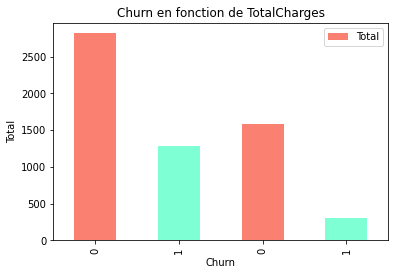

In [57]:
display("TotalCharges",df_charge)

Nous remarquons que lorsque les charges totales sont inférieures à 3000 euros, il y a 28,16% de personnes qui ne résilient pas et 12,85% qui résilient. Lorsque les charges totales sont supérieures à 3000 euros, 15,83% de personnes ne résilient pas et 3,02% des personnes résilient. 



,MonthlyCharges,Churn,Total,%
0,0,0,3849,38.49
1,0,1,1360,13.60
2,1,0,550,5.50
3,1,1,227,2.27


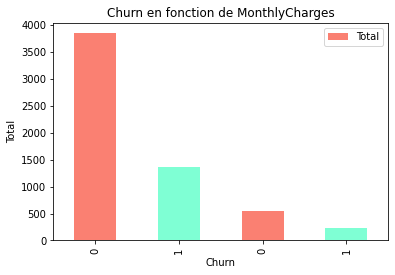

In [58]:
display("MonthlyCharges",df_charge)

Nous remarquons que lorsque les charges mensuelles sont inférieures à 100 euros, il y a 38,51% de personnes qui ne résilient pas et 13.64% qui résilient. Lorsque les charges mensuelles sont supérieures à 100 euros, 5,488% de personnes ne résilient pas et 2,23% des personnes résilient. 


*   Cette observation est cohérante, car une personne qui paie plus est amenée à résilier son contrat pour payer moins.

# 2.   Application d'un algorithme de Régression Logistique 




In [59]:
df_new.head(5)

,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,0,1,0,0,0,0,1,1,72,1,...,0,0,0,0,0,730,0,24.1,1734.65,0
9688-YGXVR,0,1,0,0,1,0,0,0,44,1,...,1,1,0,1,0,30,1,88.15,3973.20,0
9286-DOJGF,1,0,0,0,1,1,1,0,38,1,...,0,0,0,0,0,30,1,74.95,2869.85,1
6994-KERXL,0,0,1,0,0,0,0,0,4,1,...,0,0,0,0,1,30,1,55.9,238.50,0
2181-UAESM,0,0,1,0,0,0,0,0,2,1,...,0,1,0,0,0,30,0,53.45,119.50,0


In [60]:
#Séparation des données 

from sklearn.model_selection import train_test_split 

X = df_new.drop(["Churn"], axis = 1)

y = df_new["Churn"]
y=y.astype('int')
# https://stackoverflow.com/questions/45346550/valueerror-unknown-label-type-unknown

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42, stratify = y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4190, 22) (1796, 22) (4190,) (1796,)


In [61]:
#Classification non-linéaire: modèle des K-Nearest Neighbors 


from sklearn.neighbors import KNeighborsClassifier

# Instanciation du modèle
knn = KNeighborsClassifier(n_neighbors = 6)

# Entraînement du modèle sur le jeu d'entraînement
knn.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred_test_knn = knn.predict(X_test)

# Affichage des 10 premières prédictions
print(y_pred_test_knn[:10])

[0 0 0 0 0 0 0 0 1 0]


In [65]:
# On créer un decision tree de type Classifier car on est dans une problématique d'apprentissage supervisé de type régression logistique (classification)
clf = tree.DecisionTreeClassifier()

# On entraîne notre modèle
clf = clf.fit(X_train, y_train)

# On decide de faire une predicition pour notre variable test
y_pred_clf = clf.predict(X_test)

# On affiche l'accuracy de notre decision tree
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_clf))

Accuracy: 0.7232739420935412


In [62]:
#Entraînement du modèle 

# A partir du module linear_model de la librairie scikit learn on importe la fonction LogisticRegression

from sklearn.linear_model import LogisticRegression 
import numpy as np 
#On instancie le modèle et on l'entraîne 
model_log = LogisticRegression(solver="newton-cg").fit(X_train, y_train)

#On prédit les y à partir de X_test et X_train
y_pred = model_log.predict(X_test)

#On affiche les coefficients obtenus 
coeff = model_log.coef_
#On affiche la constance 
intercept = model_log.intercept_ 

#On calcule les odd ratios 
odd_ratios = np.exp(model_log.coef_)

#On crée un dataframe qui combine à la fois variables, oddrations et coefficients

resultats = pd.DataFrame(X.columns, columns=['Variables'])
resultats['Coefficients'] = model_log.coef_.tolist()[0]
resultats['Odd_Ratios'] = np.exp(model_log.coef_).tolist()[0]

#On choisit d'afficher les variables avec le coefficient le plus élevé et le plus faible 
resultats.loc[(resultats['Odd_Ratios']== max(resultats["Odd_Ratios"]))|(resultats['Odd_Ratios']== min(resultats["Odd_Ratios"]))]

# Interprétation 

# 1) Phone service: lorsque la variable PhoneService diminue de 1 (donc lorsque il n'y a pas de service téléphonique), cela diminue les chances d'appartenir à la classe positive (réabonnement) d'environ 3 fois.

# 2) PaperlessBilling: lorsque la variable PaperlessBilling augmente de 0.40 (donc lorque les factures sont dématérialisés), alors cela augmente d'environ 1 fois et demi les chances d'appartenir à la classe positive (réabonnement)


,Variables,Coefficients,Odd_Ratios
9,PhoneService,-1.045775,0.351419
19,PaperlessBilling,0.385278,1.470023


* On compare nos résultat avec les graphiques que nous avions obtenu pour "Bank transfer", "Credit card", "Electronic check", "Mailed check", "gender" et "PhoneService"  



In [66]:
resultats.head(22)

,Variables,Coefficients,Odd_Ratios
0,Bank transfer (automatic),-0.113385,0.892807
1,Credit card (automatic),-0.199274,0.819325
2,Electronic check,0.309310,1.362484
3,Mailed check,0.003350,1.003356
4,gender,0.058705,1.060462
5,SeniorCitizen,0.291747,1.338765
6,Partner,0.003165,1.003170
7,Dependents,-0.054673,0.946795
8,tenure,-0.050375,0.950873
9,PhoneService,-1.045775,0.351419


* "Bank transfer" et "Credit card" on un odd-ratio de 0.8 et un coefficien de -0.1, on calcul donc l'inverse du odd-ratio et on obtient 1.25. Ce qui veut dire que lorsque le paiement via "Bank transfer" ou via "Credit card" augmente de 1 alors cela diminue les chances de 25% de résilier. Cela est cohérent avec notre graphique, car il y seulement 2.24% de personnes qui résilient contre 10.84% qui font le contraire pour le paiement via "Bank transfer". 

* "Electronic check" a un odd-ratio de 1.36 et un coefficient de 0.3. Ce qui veut dire que lorsque le paiement se fait via "Electronic check", alors les chances qu'il a de résilier augmentent de 36%.

* "Mailed check" a un coefficient de 0.003350	et un odd-ratio de 1.0033. ce qui veut dire que lorsque le paiement ce fait via "Mailed check", alors les chances qu'il a de résilier augmentent de 0.33%. 

* "gender" a un coefficient de 0.0587	et un odd-ratio de 1.0605. ce qui veut dire que lorsque c'est une femme, alors les chances qu'elle a de résilier augmentent de 6%.

* "PhoneService" a un coefficient de -1.05 et un odd-ratio de	0.35, on calcul donc l'inverse du odd-ratio et on obtient 2.86. Ce qui veut dire que lorsque le service telephonique augment de 2 alors cela diminu les chances de 86% de résilier.


> Nos résultats sont assez cohérents avec les observations que nous avions faites via nos graphes.









Nous venons donc au sein des étapes précédentes :

D'importer notre jeu de données: variables explicatives (X) et la variable cible (y);
De séparer la base de données en une partie train et une partie test en respectant la proportion de chaque classe au sein de la base ;
D'entraîner le modèle de régression logistique sur nos données d'entraînement;
De prédire les classes de la variable cible y à partir des coefficients estimés du modèle;
De calculer les odd ratios à partir des coeficients estimés par le modèle, pour interpréter leur impact sur la variable cible.
Il reste ainsi à calculer les performances de notre modèle, pour cela nous allons utiliser la prédiction de y ainsi que des métriques adaptées au problème de classification, c'est ce que nous allons voir dans la partie suivante.



# 3. Mesure de performance : Les métriques ¶




In [64]:
#Matrice de confusion 

from sklearn.metrics import confusion_matrix

# Insérez votre code

confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("\n Vrais négatifs:",tn,"\n Faux positifs:",fp,"\n Faux négatifs:",fn,"\n Vrais positifs:",tp)

#Accuracy score 

from sklearn.metrics import accuracy_score

print("Accuracy score: " ,accuracy_score(y_test, y_pred))

# On importe la fonction balanced_accuracy_score du module metrics de la librairie Scikit Learn

from sklearn.metrics import balanced_accuracy_score

# On vérifie la répartition des classes

print("Répartition des classes : \n",y.value_counts(),"\n")

# La classe négative est surreprésentée par rapport à la classe 1.

# On affiche la balanced accuracy du modèle 

print("Balanced accuracy:",balanced_accuracy_score(y_test,y_pred))

# Les résultats obtenus avec la balanced accuracy sont  plus faibles que ceux obtenus avec 
# l'accuracy : 0.70 contre 0.79. 

# On peut donc dire que le modèle souffre du déséquilibre de classes. 


 Vrais négatifs: 1184 
 Faux positifs: 136 
 Faux négatifs: 234 
 Vrais positifs: 242
Accuracy score:  0.7939866369710468
Répartition des classes : 
 0    4399
1    1587
Name: Churn, dtype: int64 

Balanced accuracy: 0.7026865291571174
